In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('seaborn-darkgrid')

## **CSV Read**

In [ ]:
df = None
df = pd.read_csv('BitcoinUSD.csv')

#**Database**

In [ ]:
print(df)

          Timestamp  Open  High  ...  Volume_(BTC)  Volume_(Currency) Weighted_Price
0        1325317920  4.39  4.39  ...      0.455581                2.0           4.39
1        1325317980   NaN   NaN  ...           NaN                NaN            NaN
2        1325318040   NaN   NaN  ...           NaN                NaN            NaN
3        1325318100   NaN   NaN  ...           NaN                NaN            NaN
4        1325318160   NaN   NaN  ...           NaN                NaN            NaN
...             ...   ...   ...  ...           ...                ...            ...
1307313  1403756700   NaN   NaN  ...           NaN                NaN            NaN
1307314  1403756760   NaN   NaN  ...           NaN                NaN            NaN
1307315  1403756820   NaN   NaN  ...           NaN                NaN            NaN
1307316  1403756880   NaN   NaN  ...           NaN                NaN            NaN
1307317  1403756940   NaN   NaN  ...            Na               

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(df.shape)

(4605110, 8)


In [ ]:
df.head(-100)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4605005,1602006540,10714.70,10714.72,10712.35,10714.72,2.088995,22382.747778,10714.602216
4605006,1602006600,10716.37,10720.09,10715.58,10715.58,5.152735,55224.086523,10717.431766
4605007,1602006660,10717.99,10718.03,10713.00,10716.57,0.220674,2365.061935,10717.463189
4605008,1602006720,10713.00,10713.12,10713.00,10713.12,0.077308,828.203413,10713.104240


# **Timestamp to datetime**

In [ ]:
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]
df = df.set_index('Timestamp')

In [ ]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Fill values with interpolate**

In [ ]:
def fill_missing(df):
    
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()
    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()
    print(df.head())
    print(df.isnull().sum())
fill_missing(df)

                     Open  High  ...  Volume_(Currency)  Weighted_Price
Timestamp                        ...                                   
2011-12-31 07:52:00  4.39  4.39  ...           2.000000            4.39
2011-12-31 07:53:00  4.39  4.39  ...           2.436653            4.39
2011-12-31 07:54:00  4.39  4.39  ...           2.873305            4.39
2011-12-31 07:55:00  4.39  4.39  ...           3.309958            4.39
2011-12-31 07:56:00  4.39  4.39  ...           3.746611            4.39

[5 rows x 7 columns]
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
df.head(968)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39
...,...,...,...,...,...,...,...
2011-12-31 23:55:00,4.58,4.58,4.58,4.58,4.396938,20.137975,4.58
2011-12-31 23:56:00,4.58,4.58,4.58,4.58,4.385846,20.087175,4.58
2011-12-31 23:57:00,4.58,4.58,4.58,4.58,4.374754,20.036375,4.58


In [ ]:
print(df['Open'])

Timestamp
2011-12-31 07:52:00        4.39
2011-12-31 07:53:00        4.39
2011-12-31 07:54:00        4.39
2011-12-31 07:55:00        4.39
2011-12-31 07:56:00        4.39
                         ...   
2020-10-06 19:29:00    10567.17
2020-10-06 19:30:00    10570.65
2020-10-06 19:31:00    10573.98
2020-10-06 19:32:00    10586.43
2020-10-06 19:33:00    10581.00
Name: Open, Length: 4605110, dtype: float64


# **Analiza coloane**

In [ ]:
print('Analiza Volume_(BTC)')
s1 = pd.Series(df['Volume_(BTC)'])
print(s1.describe())
print()
print('Analiza Volume_(Currency)')
s2 = pd.Series(df['Volume_(Currency)'])
print(s2.describe())
print()
print('Analiza Pret mediu')
s3 = pd.Series(df['Weighted_Price'])
print(s3.describe())

Analiza Volume_(BTC)
count    4.605110e+06
mean     9.720916e+00
std      3.045479e+01
min      0.000000e+00
25%      4.894007e-01
50%      2.194392e+00
75%      8.124811e+00
max      5.853852e+03
Name: Volume_(BTC), dtype: float64

Analiza Volume_(Currency)
count    4.605110e+06
mean     2.281442e+04
std      9.244014e+04
min      0.000000e+00
25%      1.539309e+02
50%      1.163606e+03
75%      1.058132e+04
max      1.044599e+07
Name: Volume_(Currency), dtype: float64

Analiza Pret mediu
count    4.605110e+06
mean     3.131937e+03
std      3.944059e+03
min      3.800000e+00
25%      2.376600e+02
50%      6.361666e+02
75%      6.457569e+03
max      1.966330e+04
Name: Weighted_Price, dtype: float64


# **Analiza statistica chunks**

In [ ]:
chunks = pd.read_csv('BitcoinUSD.csv',chunksize=1000000)
for i, c in enumerate(chunks):
    print(f'Statistica pt partea {i} avand num el {len(c)} :\n{c.describe()}\n')

Statistica pt partea 0 avand num el 1000000 :
          Timestamp           Open  ...  Volume_(Currency)  Weighted_Price
count  1.000000e+06  295955.000000  ...      295955.000000   295955.000000
mean   1.355318e+09     135.310713  ...        2320.234664      135.292462
std    1.732052e+07     124.729307  ...       10102.412845      124.707306
min    1.325318e+09       3.800000  ...           0.000000        3.800000
25%    1.340318e+09      89.640000  ...          83.060000       89.629441
50%    1.355318e+09     115.990000  ...         242.509999      115.970000
75%    1.370318e+09     130.160000  ...        1087.086592      130.120000
max    1.385318e+09     874.810000  ...      703452.627230      874.754924

[8 rows x 8 columns]

Statistica pt partea 1 avand num el 1000000 :
          Timestamp           Open  ...  Volume_(Currency)  Weighted_Price
count  1.000000e+06  743073.000000  ...       7.430730e+05   743073.000000
mean   1.415479e+09     436.248054  ...       6.006742e+03  

# **Resampling**

In [ ]:
df_daily = df.resample("24H").mean() 
# print(df_daily.shape)
df_daily.head(1753)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370
2012-01-01,4.765576,4.765576,4.765576,4.765576,6.790640,32.971105,4.765576
2012-01-02,5.006549,5.006549,5.006549,5.006549,15.183373,75.932706,5.006549
2012-01-03,5.206530,5.206530,5.206530,5.206530,7.917041,40.795994,5.206530
2012-01-04,5.202511,5.241699,5.202511,5.241699,13.659736,72.860096,5.216680
...,...,...,...,...,...,...,...
2016-10-13,634.899913,634.999354,634.756417,634.872594,3.145319,1995.120768,634.883286
2016-10-14,635.570410,635.661715,635.458306,635.559913,3.677855,2334.775037,635.554153
2016-10-15,638.506274,638.677132,638.282382,638.437965,1.496872,956.095080,638.447419


In [ ]:
print(df_daily['Open'])

Timestamp
2011-12-31        4.476415
2012-01-01        4.765576
2012-01-02        5.006549
2012-01-03        5.206530
2012-01-04        5.202511
                  ...     
2020-10-02    10528.114097
2020-10-03    10549.086313
2020-10-04    10604.559104
2020-10-05    10704.466215
2020-10-06    10727.533888
Freq: 24H, Name: Open, Length: 3203, dtype: float64


In [ ]:
print(df_daily.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')


In [ ]:
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

# **Timestamp to column**


In [ ]:
df_daily['tmp'] = df_daily.index
print(df_daily)

                    Open          High  ...  Weighted_Price        tmp
Timestamp                               ...                           
2011-12-31      4.476415      4.478946  ...        4.477370 2011-12-31
2012-01-01      4.765576      4.765576  ...        4.765576 2012-01-01
2012-01-02      5.006549      5.006549  ...        5.006549 2012-01-02
2012-01-03      5.206530      5.206530  ...        5.206530 2012-01-03
2012-01-04      5.202511      5.241699  ...        5.216680 2012-01-04
...                  ...           ...  ...             ...        ...
2020-10-02  10528.114097  10531.836177  ...    10528.595023 2020-10-02
2020-10-03  10549.086313  10551.084976  ...    10549.760898 2020-10-03
2020-10-04  10604.559104  10606.283399  ...    10605.085571 2020-10-04
2020-10-05  10704.466215  10707.039087  ...    10705.229071 2020-10-05
2020-10-06  10727.533888  10722.209229  ...    10728.008600 2020-10-06

[3203 rows x 8 columns]


In [ ]:
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

# **Gestionarea elementelor nule**

In [ ]:
# Verificare elemente nule
df_daily['tmp'].isnull().sum()

0

In [ ]:
print(df_daily['tmp'].values)
# df_daily['tmp'].values.reshape(-1,1)

['2011-12-31T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2012-01-02T00:00:00.000000000' ... '2020-10-04T00:00:00.000000000'
 '2020-10-05T00:00:00.000000000' '2020-10-06T00:00:00.000000000']


In [ ]:
df_daily['Weighted_Price'].isnull().sum()

3

In [ ]:
df_daily.isnull().sum()

Open                 3
High                 3
Low                  3
Close                3
Volume_(BTC)         3
Volume_(Currency)    3
Weighted_Price       3
tmp                  0
dtype: int64

In [ ]:
df_daily.dropna(inplace=True)

In [ ]:
df_daily.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
tmp                  0
dtype: int64

# **Dataset yearly**

In [ ]:
df_yearly = df.resample('12M').mean()
df_yearly.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370
2012-12-31,8.233084,8.235009,8.230306,8.232210,16.377516,139.649586,8.232582
2013-12-31,187.436306,187.681208,187.161517,187.426512,13.915605,3219.400491,187.412080
2014-12-31,525.561363,525.949363,525.162274,525.567830,10.702176,5560.020283,525.544492
2015-12-31,272.196050,272.316483,272.062738,272.194502,12.411528,3445.986390,272.185093


# **Dataset Montly**

In [ ]:
df_monthly = df.resample('1M').mean()
df_monthly.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.476415,4.478946,4.476415,4.478946,17.940426,79.495594,4.477370
2012-01-31,6.205873,6.208926,6.203568,6.206636,5.062630,30.557645,6.205749
2012-02-29,5.239485,5.240140,5.237452,5.238107,8.246900,42.804255,5.238445
2012-03-31,4.956081,4.956802,4.950829,4.951425,13.496505,67.005496,4.954135
2012-04-30,4.980339,4.981768,4.978907,4.980228,18.311532,90.911425,4.980298


# **Distribuita pretului mediu pe ani**



In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

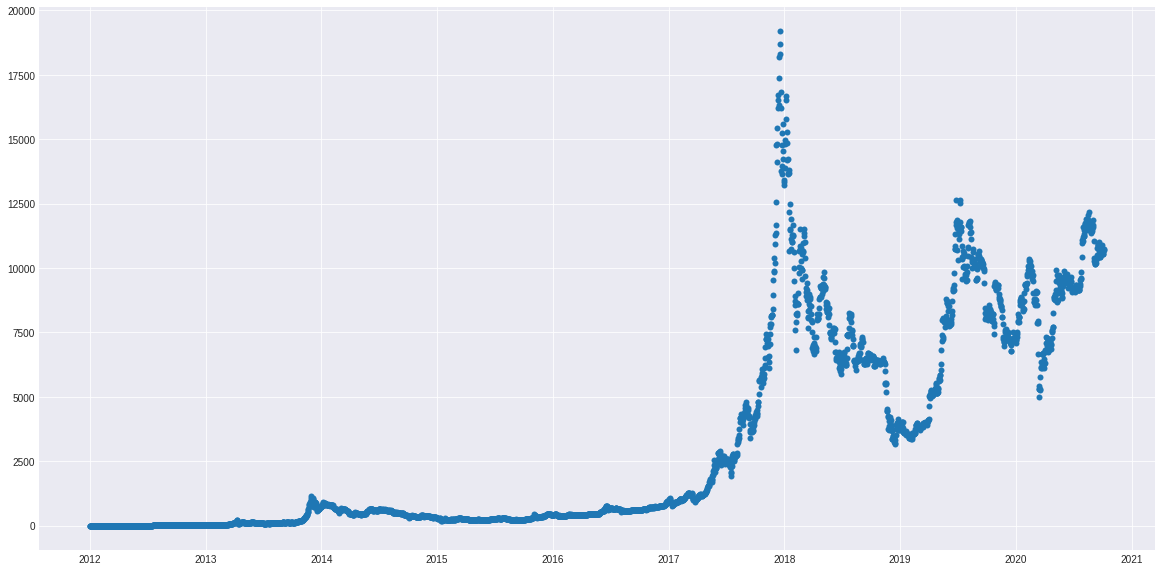

In [ ]:
plt.scatter(df_daily['tmp'],df_daily['Weighted_Price'],linewidths=0.0001)

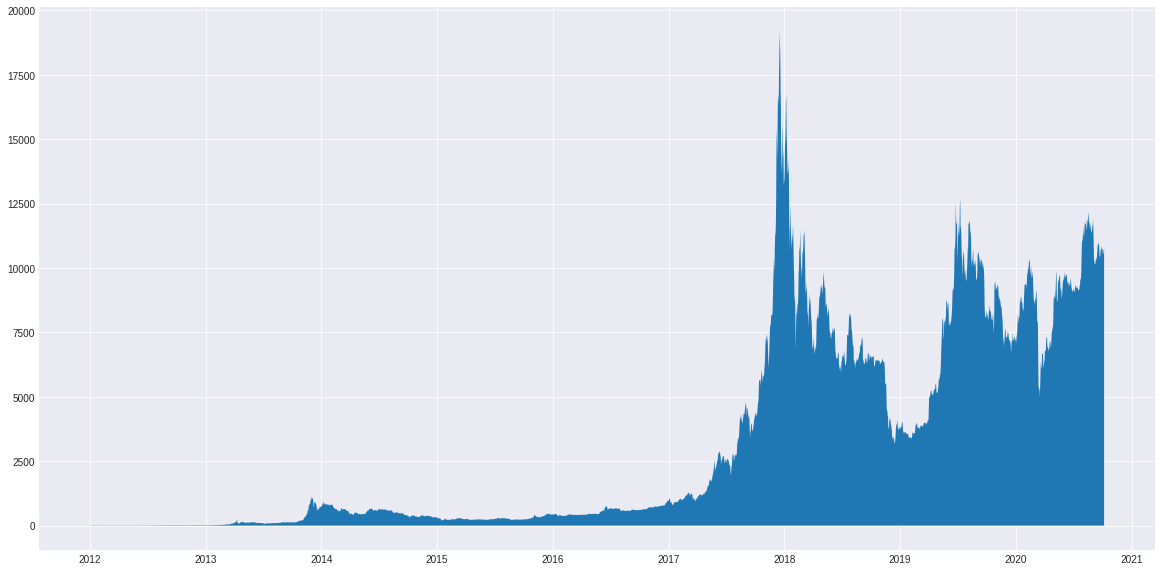

In [ ]:
plt.fill_between(df_daily['tmp'],df_daily['Weighted_Price'])

# **Numarul de monede tranzactionate(Volumul) pe ani**

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


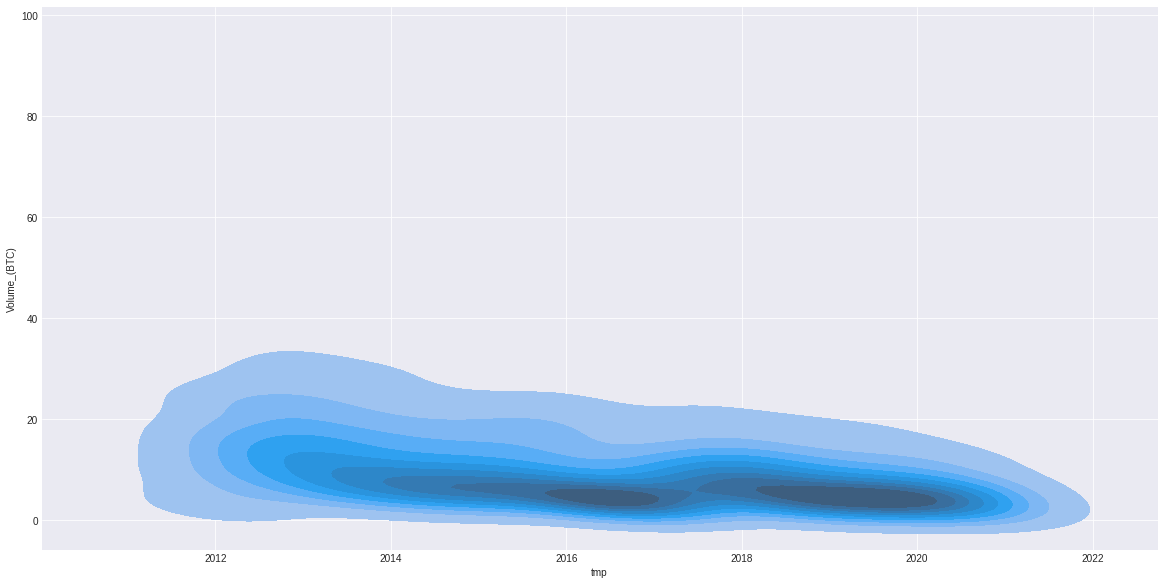

In [ ]:
sns.kdeplot(df_daily['tmp'],df_daily['Volume_(BTC)'], shade = True)

# **Linear Regression**

In [ ]:
df_daily.index

DatetimeIndex(['2011-12-31', '2012-01-01', '2012-01-02', '2012-01-03',
               '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07',
               '2012-01-08', '2012-01-09',
               ...
               '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06'],
              dtype='datetime64[ns]', name='Timestamp', length=3200, freq=None)

In [ ]:
dff = df.reset_index()

In [ ]:
from sklearn.linear_model import LinearRegression as lr

model1 = lr(copy_X = True, fit_intercept=True, normalize=True)

# X trebuie redimensionat 
X1 = dff.index.values.reshape(-1,1)
y1 = dff['Weighted_Price']
# X=df_daily['tmp'].map(df_daily.datetime.toordinal)

m1 = model1.fit(X1,y1)
print(type(X1))
print(type(y1))

print(m1.coef_)
z1 = model1.predict(X1)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[0.00240203]


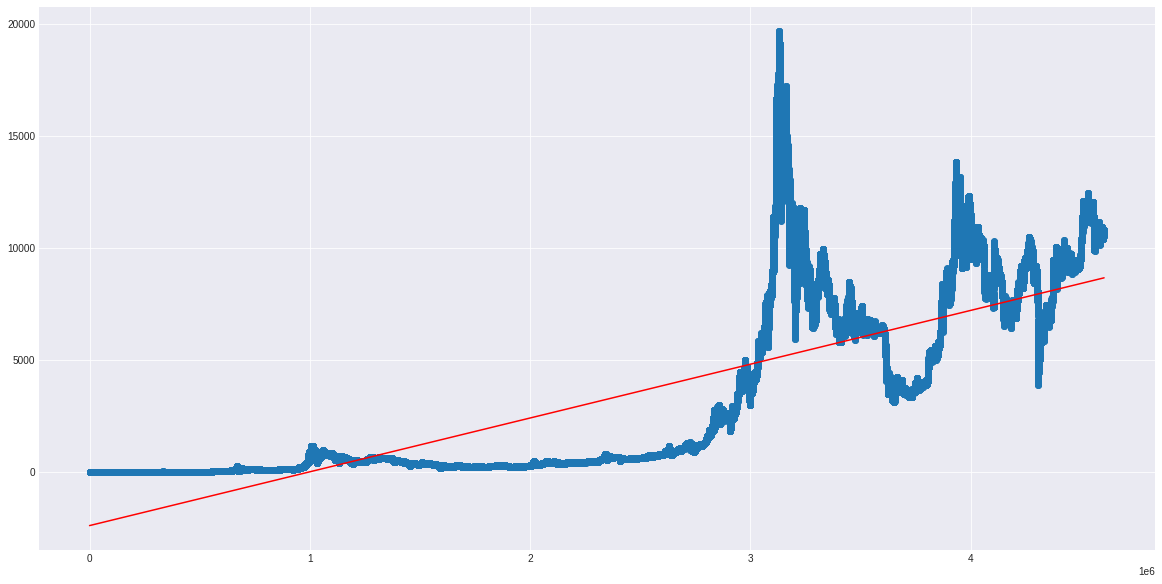

In [ ]:
plt.scatter(X1,y1)
plt.plot(X1,z1,color='red')

In [ ]:
from sklearn.linear_model import LinearRegression as lr

model2 = lr(copy_X = True, fit_intercept=True, normalize=True)

# X trebuie redimensionat 
# X = dff['Volume_(BTC)'].values.reshape(-1,1)
# y = dff['Weighted_Price']
X2 = dff['Weighted_Price'].values.reshape(-1,1)
y2 = dff['Volume_(BTC)']
# X=df_daily['tmp'].map(df_daily.datetime.toordinal)

m2 = model2.fit(X2,y2)
print(type(X2))
print(type(y2))

print(m2.coef_)
z2 = model2.predict(X2)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[-0.00049055]


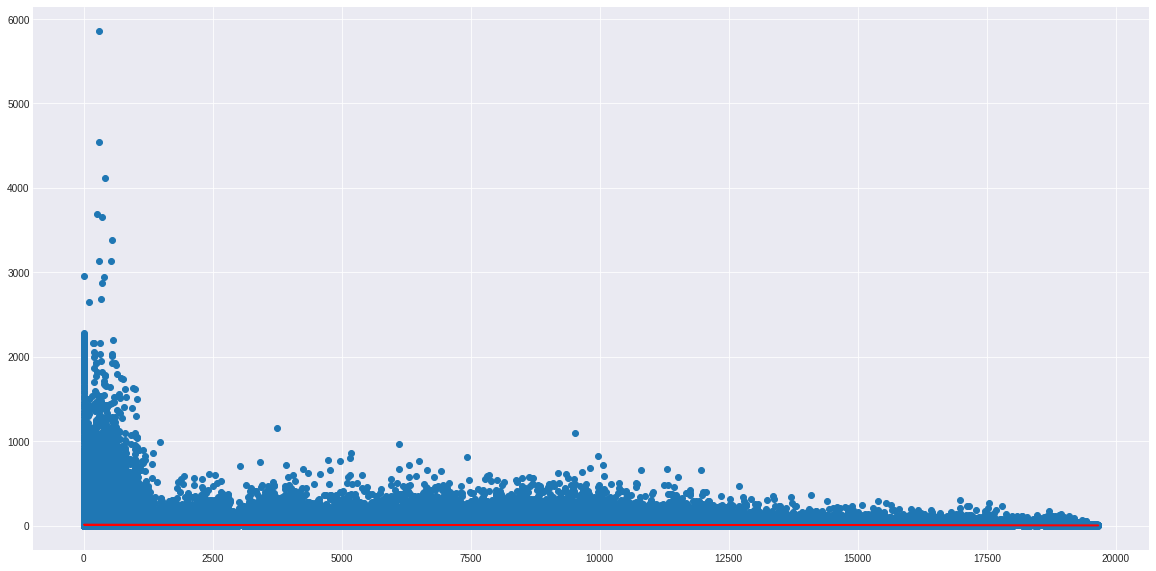

In [ ]:
plt.scatter(X2,y2)
plt.plot(X2,z2,color='red')

In [ ]:
model3 = lr(copy_X = True, fit_intercept=True, normalize=False)
dff_yearly = df_yearly.reset_index()
# X trebuie redimensionat 
X3 = dff.index[:,None]
y3 = dff['Volume_(BTC)']
# X=df_daily['tmp'].map(df_daily.datetime.toordinal)

m3 = model3.fit(X3,y3)
print(type(X3))
print(type(y3))

print(m3.coef_)
z3 = model3.predict(X3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[-2.41069868e-06]


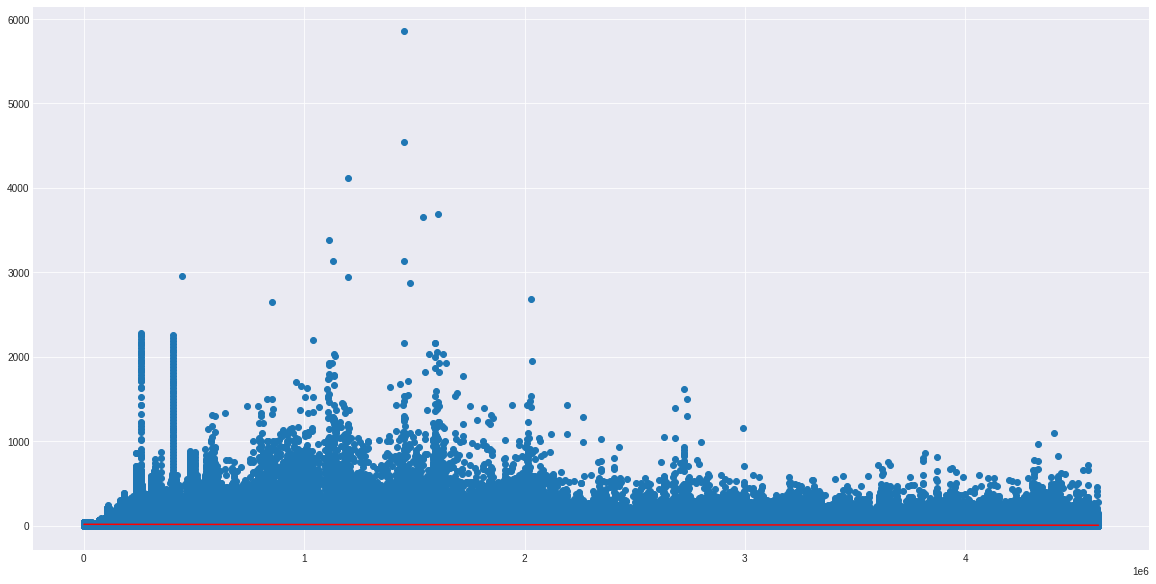

In [ ]:
plt.scatter(X3,y3)
plt.plot(X3,z3,color='red')

In [ ]:
model4 = lr(copy_X = True, fit_intercept=True, normalize=False)
dff_yearly = df_yearly.reset_index()
# X trebuie redimensionat 
y4 = dff['Volume_(BTC)']
X4 = dff['Volume_(Currency)'][:,None]
# X=df_daily['tmp'].map(df_daily.datetime.toordinal)

m4 = model4.fit(X4,y4)
print(type(X4))
print(type(y4))

print(m4.coef_)
z4 = model4.predict(X4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[0.00012613]


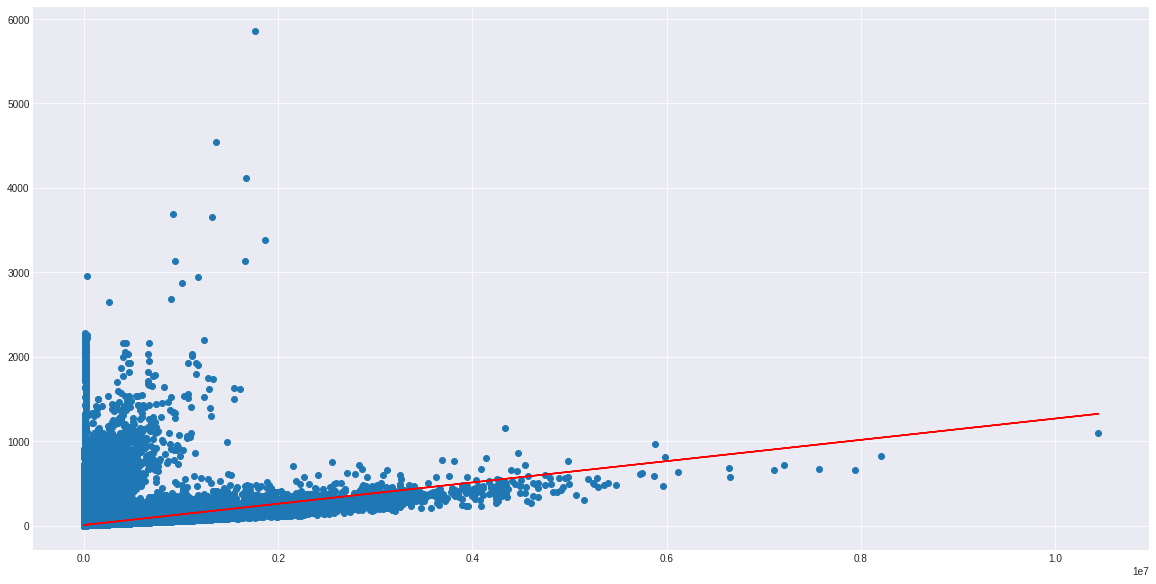

In [ ]:
plt.scatter(X4,y4)
plt.plot(X4,z4,color='red')

# **Functie pentru regresia dintre 2 variabile pe o anumita perioada de timp**
## **Interval mai dens si sa vedem local pe cea originala cu valori multe, sa compar de ex 2 saptamani , daca volum a influentat pretul.Pe intervalele alese pe cateva sute de valori Histograme + Histograme 2D**

In [ ]:
test_db = pd.read_csv('BitcoinUSD.csv')

In [ ]:
test_db.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_db = test_db.dropna()

In [ ]:
test_db.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


Timestamp to datetime

In [ ]:
test_db['Timestamp'] = [datetime.fromtimestamp(x) for x in test_db['Timestamp']]
test_db = test_db.set_index('Timestamp')

In [ ]:
test_daily = test_db.resample("24H").mean() 
# print(df_daily.shape)
test_daily.head(-20)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2020-12-07,19199.665847,19206.816542,19191.190833,19199.308979,3.002271,57579.578037,19198.998589
2020-12-08,18942.317028,18951.525715,18932.566604,18942.533208,4.152754,78069.694910,18942.096815
2020-12-09,18265.518347,18276.763708,18254.652194,18266.172181,6.185379,112804.344035,18265.613948


In [ ]:
test_db['tmp'] = test_db.index

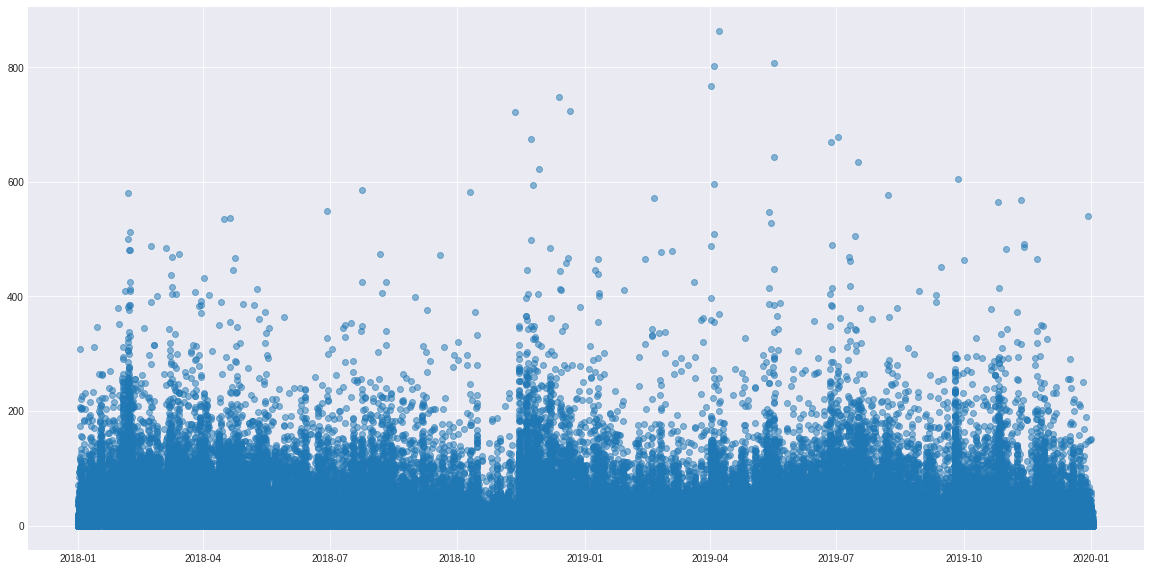

In [ ]:
plt.scatter(test_db['tmp']['2018-1-1':'2020-1-1'],test_db['Volume_(BTC)']['2018-1-1':'2020-1-1'] , alpha=0.5)

# **Regresie , volumul(BTC) pe o perioada anume de timp**

In [ ]:
x = test_db['tmp']['2018-1-1':'2020-1-1']
y = test_db['Weighted_Price']['2018-1-1':'2020-1-1']
print(len(x))
print(len(y))
print(type(x))
print(type(y))

1015508
1015508
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# Reshape x

x1 = x.values.reshape(-1,1)
x2 = x[:,None]
print(x1.shape)
print(x2.shape)
x3 = x.to_numpy()
x3 = x3.reshape(-1,1)
print(x3.shape)

(1015508, 1)
(1015508, 1)
(1015508, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
model_test = lr(copy_X = True, fit_intercept=True, normalize=True)

# x = test_db['tmp']['2018-1-1':'2020-1-1']
# print(x)

# X trebuie redimensionat 
X_test = x3
y_test = y
# X=df_daily['tmp'].map(df_daily.datetime.toordinal)

m_test = model_test.fit(X_test,y_test)
print(type(X_test))
print(type(y_test))

print(m_test.coef_)
z_test = model_test.predict(X_test)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
[-8.32235547e-15]


TypeError: ignored

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,z_test,color='red')

## **test szabi under here**

In [ ]:
dfr = None
dfr = pd.read_csv('BitcoinUSD.csv')
dfr.dropna(inplace=True)
dfr['Timestamp'] = [datetime.fromtimestamp(x) for x in dfr['Timestamp']]
dfr = dfr.set_index('Timestamp')
dfr_daily = dfr.resample("24H").mean() 
dfr_daily['tmp'] = dfr_daily.index
print(dfr_daily)
dfr_daily = dfr.resample("24H").mean() 
# print(df_daily.shape)
dfr_daily.head(1753)




                    Open          High  ...  Weighted_Price        tmp
Timestamp                               ...                           
2011-12-31      4.465000      4.482500  ...        4.471603 2011-12-31
2012-01-01      4.806667      4.806667  ...        4.806667 2012-01-01
2012-01-02      5.000000      5.000000  ...        5.000000 2012-01-02
2012-01-03      5.252500      5.252500  ...        5.252500 2012-01-03
2012-01-04      5.200000      5.223333  ...        5.208159 2012-01-04
...                  ...           ...  ...             ...        ...
2020-12-27  27045.516160  27071.948215  ...    27043.386470 2020-12-27
2020-12-28  26963.081993  26984.362924  ...    26964.020499 2020-12-28
2020-12-29  26671.013021  26689.382486  ...    26671.008099 2020-12-29
2020-12-30  28141.217201  28164.193854  ...    28141.234408 2020-12-30
2020-12-31  28893.210000  28928.490000  ...    28909.166061 2020-12-31

[3289 rows x 8 columns]


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2016-10-13,634.901632,635.014846,634.760437,634.888252,3.061055,1942.144819,634.897114
2016-10-14,635.567901,635.682073,635.442386,635.571186,4.113199,2611.758986,635.558700
2016-10-15,638.485054,638.666866,638.257972,638.426399,1.542141,985.088441,638.436560


(0.0, 344280.0)

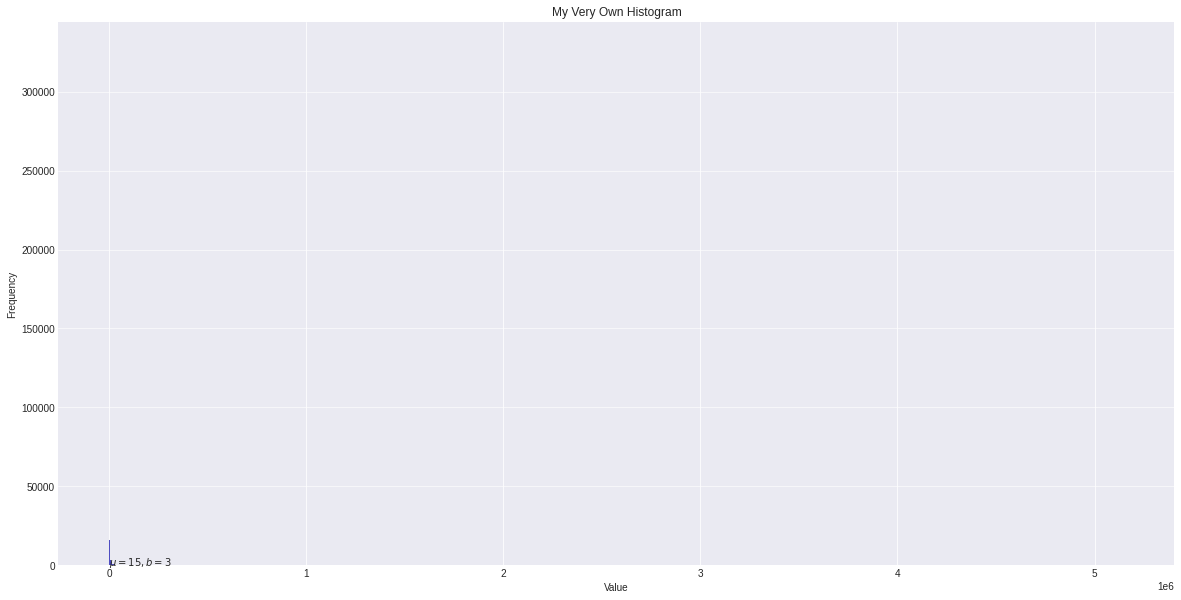

In [ ]:
n, bins, patches = plt.hist(x=dfr['Volume_(Currency)']['2013-1-1':'2018-1-1'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
print(n)
print('--------')

print(bins)
print('--------')

print(patches)
print('--------')

[3.44271e+05 1.76310e+05 1.05749e+05 ... 0.00000e+00 0.00000e+00
 1.00000e+00]
--------
[0.00000000e+00 9.95441590e+01 1.99088318e+02 ... 5.14772710e+06
 5.14782664e+06 5.14792618e+06]
--------
<a list of 51715 Patch objects>
--------


#***!!!Procesare paralela***

Comparatia pe timpi de executie!!!

Alegem fiecare o parte semnificativa , ne focusam pe acea parte si dam o solutie alternativa
Prezentare: Solutia originala + Cea alternativa
Tranzactie pe categorii de ex pe zilele saptamanii.